## 引用需要用到的代码库

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf
import yfinance as yf

## 从yahoo finance获取德方纳米过去30天的日交易数据

In [10]:
# 将yahoo finance下载的数据格式设为Pandas Dataframe
stock = yf.Ticker("300769.SZ")

dfnm = stock.history(start="2024-07-01", end="2024-07-31")
dfnm.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,22.000000,22.000000,22.000000,22.000000,2.200000e+01,22.0,22.0
mean,27.263636,27.845455,26.827727,27.212273,6.587649e+06,0.0,0.0
std,0.761274,0.767927,0.752778,0.802377,1.490965e+06,0.0,0.0
min,25.850000,26.080000,25.600000,25.799999,4.408632e+06,0.0,0.0
25%,26.650000,27.400000,26.062500,26.467500,5.705316e+06,0.0,0.0
50%,27.450000,28.045000,26.980000,27.510000,6.261478e+06,0.0,0.0
75%,27.885000,28.405000,27.432500,27.797500,7.404730e+06,0.0,0.0
max,28.270000,29.150000,27.930000,28.350000,1.053768e+07,0.0,0.0


## 一行代码生成常规股票走势图

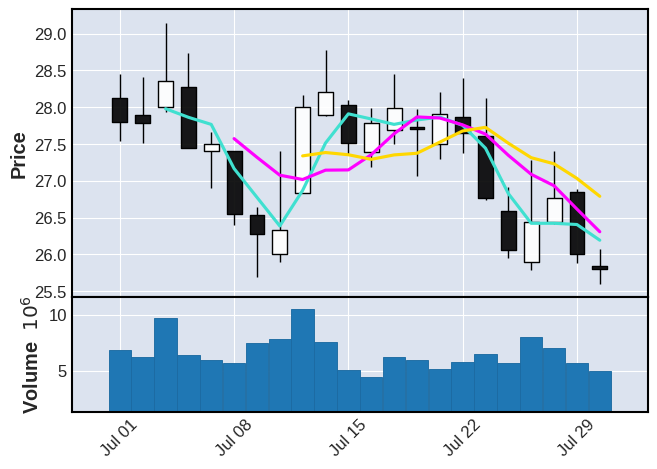

In [11]:
mpf.plot(dfnm,type='candle',mav=(3,6,9),volume=True)

## 自己画Candlestick图表，可以随意个性化

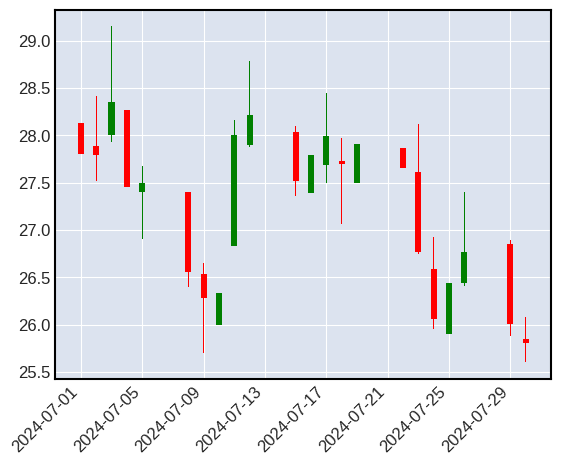

In [12]:
# https://www.statology.org/matplotlib-python-candlestick-chart/

#create figure
plt.figure()

#define width of candlestick elements
width = .4
width2 = .05

#define up and down prices
up = dfnm[dfnm['Close']>=dfnm['Open']]
down = dfnm[dfnm['Close']<dfnm['Open']]

#define colors to use
col1 = 'green'
col2 = 'red'

#plot up prices
plt.bar(up.index,up["Close"]-up["Open"],width,bottom=up["Open"],color=col1)
plt.bar(up.index,up["High"]-up["Close"],width2,bottom=up["Close"],color=col1)
plt.bar(up.index,up["Low"]-up["Open"],width2,bottom=up["Open"],color=col1)

#plot down prices
plt.bar(down.index,down["Close"]-down["Open"],width,bottom=down["Open"],color=col2)
plt.bar(down.index,down["High"]-down["Open"],width2,bottom=down["Open"],color=col2)
plt.bar(down.index,down["Low"]-down["Close"],width2,bottom=down["Close"],color=col2)

#rotate x-axis tick labels
plt.xticks(rotation=45, ha='right')

#display candlestick chart
plt.show()

## 在生成的图表中画线或添加其他数据图表

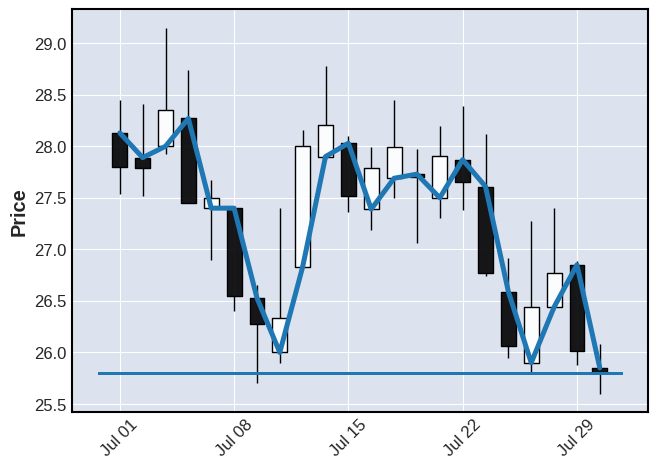

In [13]:
apdict = mpf.make_addplot(dfnm['Open'])
min = dfnm['Close'].min()

mpf.plot(dfnm,type='candle',hlines=[min],addplot=apdict,figscale=1)

## 找到时间段的**最高**和**最低**点并在图表中画出来

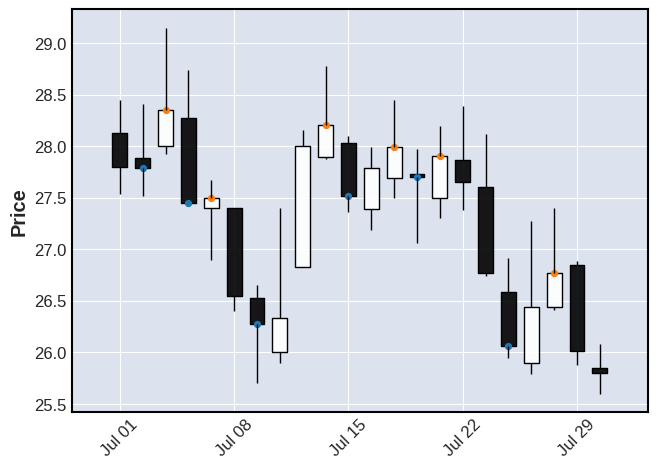

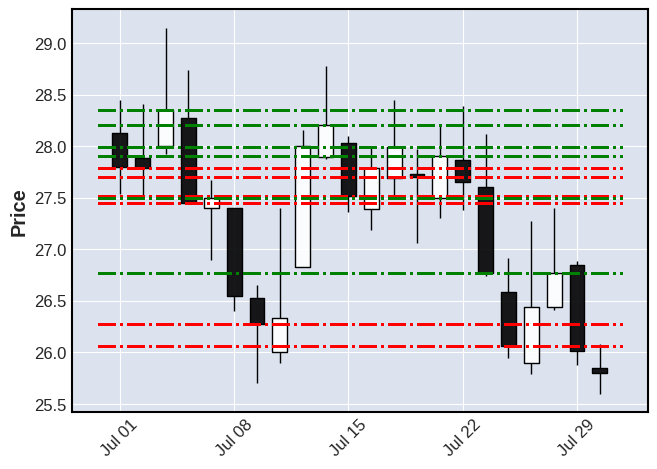

In [14]:
target_1 = 'Close'
target_2 = 'Close'
dfnm['min'] = dfnm[target_1][(dfnm[target_1].shift(1) > dfnm[target_1]) & (dfnm[target_1].shift(-1) > dfnm[target_1])]
dfnm['max'] = dfnm[target_2][(dfnm[target_2].shift(1) < dfnm[target_2]) & (dfnm[target_2].shift(-1) < dfnm[target_2])]

minDict = mpf.make_addplot(dfnm['min'],type='scatter')
maxDict = mpf.make_addplot(dfnm['max'],type='scatter')
mpf.plot(dfnm,type='candle',addplot=[minDict, maxDict])

joined = pd.concat([dfnm['min'], dfnm['max']]).dropna().values.tolist()
joinedColors = np.concatenate((np.full((dfnm['min'].count()), 'r'), np.full((dfnm['max'].count()), 'g'))).tolist()
mpf.plot(dfnm,type='candle',hlines=dict( hlines=joined,colors=joinedColors,linestyle='-.'))

## 想怎么标注就怎么标注

/tmp/ipykernel_676/669516656.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = dfnm['min'][i]


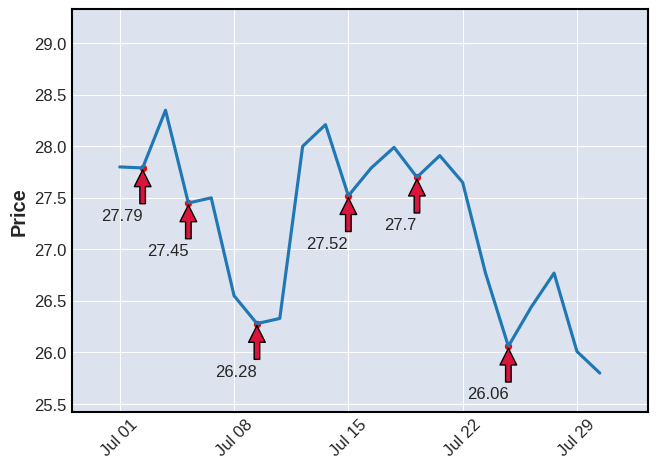

In [15]:
target_1 = 'Close'
# target_2 = 'Close'
dfnm['min'] = dfnm[target_1][(dfnm[target_1].shift(1) > dfnm[target_1]) & (dfnm[target_1].shift(-1) > dfnm[target_1])]
# dfnm['max'] = dfnm[target_2][(dfnm[target_2].shift(1) < dfnm[target_2]) & (dfnm[target_2].shift(-1) < dfnm[target_2])]

minDict = mpf.make_addplot(dfnm['min'],type='scatter', color='r')
fig, axlist = mpf.plot(dfnm,type='line',addplot=[minDict],returnfig=True)

for i in range(len(dfnm['min'])):
    x = i
    y = dfnm['min'][i]
    axlist[0].annotate(np.round(y, decimals=2), xy=(x, y), xycoords='data',
            xytext=(0, -40), textcoords='offset points',
            arrowprops=dict(facecolor='crimson', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom')

In [16]:
target_1 = 'Close'
# target_2 = 'Close'
dfnm['min'] = dfnm[target_1][(dfnm[target_1].shift(1) > dfnm[target_1]) & (dfnm[target_1].shift(-1) > dfnm[target_1])]
# dfnm.iloc[0]
dfnm[target_1][(dfnm.index > dfnm.iloc[0].index) & (dfnm.index < dfnm['min'][0].index)]

ValueError: Lengths must match to compare